# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder

loadingPath = "CSGO-dataset"

# Visualisation globale des données

## Chargement des données

In [18]:
#loading picks
currentFile = open(loadingPath+"/results.csv")

res = pd.read_csv(currentFile)

# on affiche les colonnes
res

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,E-frag.net,Inferno,13,16,2,1,8,7,5,9,1970,2299059,7,16,1,2,2
45769,2015-11-05,G2,E-frag.net,Dust2,16,13,1,1,10,5,6,8,1970,2299059,7,16,1,2,2
45770,2015-11-04,CLG,Liquid,Inferno,16,12,1,1,7,8,9,4,1934,2299011,10,14,16,12,1
45771,2015-11-03,NiP,Dignitas,Train,16,4,1,2,4,1,12,3,1934,2299001,6,12,16,4,1


## Noms des différentes colonnes

In [19]:
res.head(0)

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner


## Quelques lignes du dataset

In [20]:
nb_ligne = 10
res.head(nb_ligne)

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
5,2020-03-17,Singularity,Endpoint,Overpass,13,16,2,2,8,6,5,10,5247,2340456,71,41,0,2,2
6,2020-03-17,Singularity,Endpoint,Vertigo,11,16,2,1,6,9,5,7,5247,2340456,71,41,0,2,2
7,2020-03-17,Espada,Tricked,Dust2,16,10,1,2,3,8,13,2,5247,2340455,56,77,2,0,1
8,2020-03-17,Espada,Tricked,Nuke,16,10,1,1,7,8,9,2,5247,2340455,56,77,2,0,1
9,2020-03-17,fnatic,BIG,Mirage,12,16,2,1,9,6,3,10,5226,2340397,5,18,1,2,2


## Répartition des données (moyenne,min,max,25%...)

In [21]:
res.describe()

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
count,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000,4.577300e+04,45773.000000,45773.000000,45773.000000,45773.000000,45773.000000
mean,13.385489,12.731545,1.462478,1.501387,6.659515,6.057283,6.375571,6.335482,3580.790859,2.321278e+06,68.394228,77.289428,4.896708,4.597710,1.464204
std,4.417713,4.715722,0.498596,0.500004,3.257815,3.161310,3.184036,3.285287,904.337168,1.170610e+04,61.835919,65.708309,6.044017,5.931323,0.498722
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,820.000000,2.299001e+06,1.000000,1.000000,0.000000,0.000000,1.000000
25%,11.000000,9.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,2818.000000,2.311132e+06,22.000000,28.000000,1.000000,1.000000,1.000000
50%,16.000000,16.000000,1.000000,2.000000,7.000000,6.000000,6.000000,6.000000,3572.000000,2.321956e+06,49.000000,58.000000,2.000000,2.000000,1.000000
75%,16.000000,16.000000,2.000000,2.000000,9.000000,8.000000,9.000000,9.000000,4346.000000,2.331691e+06,96.000000,110.000000,8.000000,7.000000,2.000000
max,38.000000,41.000000,2.000000,2.000000,15.000000,16.000000,15.000000,15.000000,5248.000000,2.340461e+06,404.000000,404.000000,34.000000,34.000000,2.000000


## Informations relatives aux types des colonnes

In [22]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          45773 non-null  object
 1   team_1        45773 non-null  object
 2   team_2        45773 non-null  object
 3   _map          45773 non-null  object
 4   result_1      45773 non-null  int64 
 5   result_2      45773 non-null  int64 
 6   map_winner    45773 non-null  int64 
 7   starting_ct   45773 non-null  int64 
 8   ct_1          45773 non-null  int64 
 9   t_2           45773 non-null  int64 
 10  t_1           45773 non-null  int64 
 11  ct_2          45773 non-null  int64 
 12  event_id      45773 non-null  int64 
 13  match_id      45773 non-null  int64 
 14  rank_1        45773 non-null  int64 
 15  rank_2        45773 non-null  int64 
 16  map_wins_1    45773 non-null  int64 
 17  map_wins_2    45773 non-null  int64 
 18  match_winner  45773 non-null  int64 
dtypes: i

## Sélection des types numériques

In [23]:
numeric = res.select_dtypes(include=['int64','float64'])
numeric

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,13,16,2,1,8,7,5,9,1970,2299059,7,16,1,2,2
45769,16,13,1,1,10,5,6,8,1970,2299059,7,16,1,2,2
45770,16,12,1,1,7,8,9,4,1934,2299011,10,14,16,12,1
45771,16,4,1,2,4,1,12,3,1934,2299001,6,12,16,4,1


##  Représentation des données numériques sous forme de gradient et highlighting

In [24]:
numeric.head(nb_ligne).style.background_gradient(axis=0).highlight_max(color='crimson').highlight_min(color='navajowhite')

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
5,13,16,2,2,8,6,5,10,5247,2340456,71,41,0,2,2
6,11,16,2,1,6,9,5,7,5247,2340456,71,41,0,2,2
7,16,10,1,2,3,8,13,2,5247,2340455,56,77,2,0,1
8,16,10,1,1,7,8,9,2,5247,2340455,56,77,2,0,1
9,12,16,2,1,9,6,3,10,5226,2340397,5,18,1,2,2


## Sélection des types catégoriques

In [25]:
res.select_dtypes(exclude=['int64','float64'])

,date,team_1,team_2,_map
0,2020-03-18,Recon 5,TeamOne,Dust2
1,2020-03-18,Recon 5,TeamOne,Inferno
2,2020-03-18,New England Whalers,Station7,Inferno
3,2020-03-18,Rugratz,Bad News Bears,Inferno
4,2020-03-18,Rugratz,Bad News Bears,Vertigo
...,...,...,...,...
45768,2015-11-05,G2,E-frag.net,Inferno
45769,2015-11-05,G2,E-frag.net,Dust2
45770,2015-11-04,CLG,Liquid,Inferno
45771,2015-11-03,NiP,Dignitas,Train


## Encodage des données catégoriques de la colonne "map"

In [26]:
ord_enc = OrdinalEncoder()
res['map_code'] = ord_enc.fit_transform(res[['_map']])
res[['_map','map_code']].head(11)

,_map,map_code
0,Dust2,3.0
1,Inferno,4.0
2,Inferno,4.0
3,Inferno,4.0
4,Vertigo,9.0
5,Overpass,7.0
6,Vertigo,9.0
7,Dust2,3.0
8,Nuke,6.0
9,Mirage,5.0


# Pourcentage de victoire de l'équipe avec le plus haut rank

In [27]:
# on va essayer de voir pour chaque map si l'équipe avec le plus haut rank gagne
# on sélectionne les colonnes qui nous intéressent seulement
col = [3,14,15,18]
cols = res.columns[col]
res[cols]

,_map,rank_1,rank_2,match_winner
0,Dust2,62,63,2
1,Inferno,62,63,2
2,Inferno,140,118,2
3,Inferno,61,38,2
4,Vertigo,61,38,2
...,...,...,...,...
45768,Inferno,7,16,2
45769,Dust2,7,16,2
45770,Inferno,10,14,1
45771,Train,6,12,1


In [28]:
# on récupère les différentes map sans doublons
maps = list( dict.fromkeys(res['_map']))
dicMap = {}

for i in range(0,len(maps)):
    dicMap[maps[i]] = []

dicMap

{'Dust2': [],
 'Inferno': [],
 'Vertigo': [],
 'Overpass': [],
 'Nuke': [],
 'Mirage': [],
 'Train': [],
 'Default': [],
 'Cache': [],
 'Cobblestone': []}

In [30]:

for m in maps:
    tmp_l = []
    for i in range(0,len(res.index)):
        if res.iloc[i,3] == m:
            rk1 = res.iloc[i,14]
            rk2 = res.iloc[i,15]
            winner = res.iloc[i,18]
            if rk1 > rk2:
                if winner == 2:
                    tmp_l.append(True)
                else:
                    tmp_l.append(False)
            elif rk2 > rk1:
                if winner == 1:
                    tmp_l.append(True)
                else:
                    tmp_l.append(False)
    dicMap[m] = tmp_l
    
for cle, val in dicMap.items():
    if len(val) != 0:
        dicMap[cle] = (val.count(True) / len(val)) * 100
    else:
        dicMap[cle] = 0

dicMap

{'Dust2': 66.23723869713174,
 'Inferno': 63.79425517702071,
 'Vertigo': 64.20361247947454,
 'Overpass': 63.80444444444444,
 'Nuke': 65.14503090822635,
 'Mirage': 65.15907327347301,
 'Train': 64.40755406640268,
 'Default': 76.19047619047619,
 'Cache': 64.86017775850857,
 'Cobblestone': 65.61343580984914}

Text(0.5, 1.0, "Pourcentage de victoire de l'équipe avec le plus haut rank")

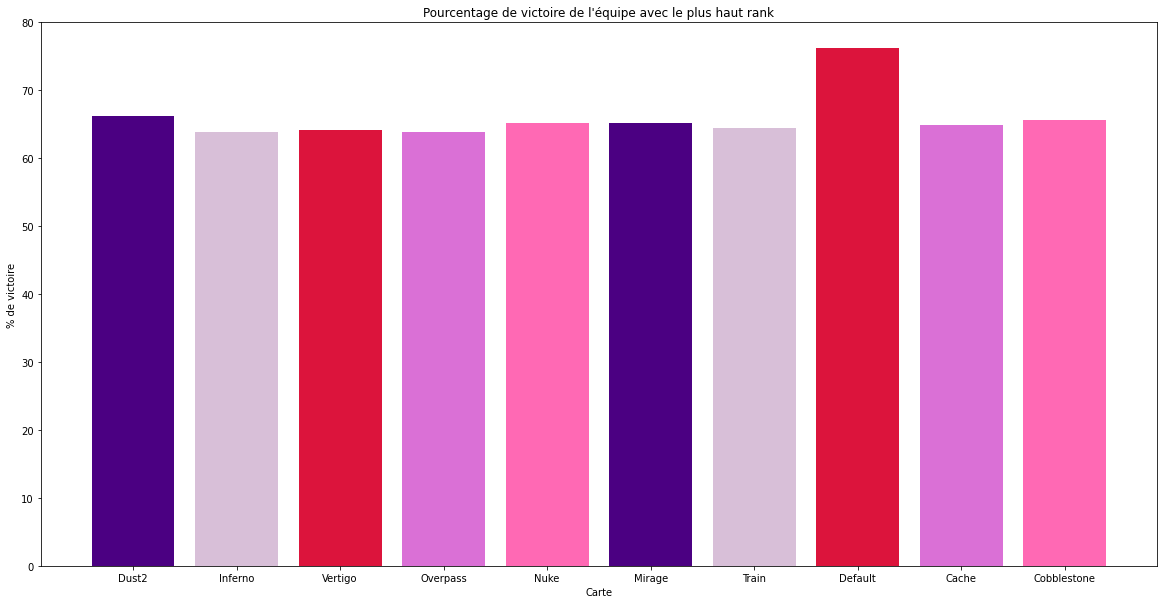

In [31]:
cles = dicMap.keys()
values = dicMap.values()
plt.figure(figsize=(20, 10))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Carte")
plt.ylabel("% de victoire")
plt.title("Pourcentage de victoire de l'équipe avec le plus haut rank")

# Les cartes les plus joués

In [16]:
res.head(0)

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner,map_code


In [17]:
dicMostPlayed = {}

for i in range(0,len(maps)):
    dicMostPlayed[maps[i]] = 0

dicMostPlayed

{'Dust2': 0,
 'Inferno': 0,
 'Vertigo': 0,
 'Overpass': 0,
 'Nuke': 0,
 'Mirage': 0,
 'Train': 0,
 'Default': 0,
 'Cache': 0,
 'Cobblestone': 0}

In [18]:
for m in maps:
    for i in range(0,len(res.index)):
        if res.iloc[i,3] == m:
            dicMostPlayed[m] += 1
            
dicMostPlayed

{'Dust2': 4114,
 'Inferno': 7485,
 'Vertigo': 609,
 'Overpass': 5625,
 'Nuke': 4206,
 'Mirage': 9021,
 'Train': 6566,
 'Default': 21,
 'Cache': 4613,
 'Cobblestone': 3513}

Text(0.5, 1.0, 'Graphique représentant les cartes les plus joués du dataset')

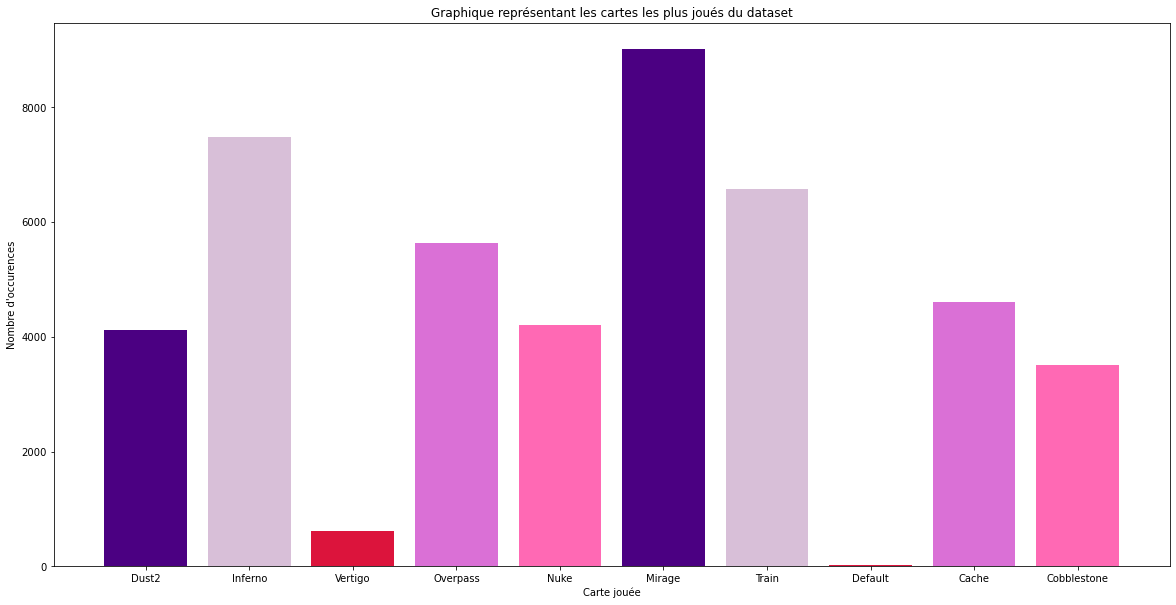

In [48]:
# on affiche
cles = dicMostPlayed.keys()
values = dicMostPlayed.values()
plt.figure(figsize=(20, 10))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Carte jouée")
plt.ylabel("Nombre d'occurences")
plt.title("Graphique représentant les cartes les plus joués du dataset")

# Si le fait de commencer "ct" nous fait gagner 

In [25]:
col = [7,18]
cols = res.columns[col]
rows = 10 
res[cols].head(rows)

,starting_ct,match_winner
0,2,2
1,2,2
2,1,2
3,2,2
4,2,2
5,2,2
6,1,2
7,2,1
8,1,1
9,1,2


In [37]:
boolDic = {}
boolDic['True'] = 0
boolDic['False'] = 0

for i in range(0,len(res.index)):
    if res.iloc[i,7] == res.iloc[i,18]:
        boolDic['True'] += 1
    else:
        boolDic['False'] += 1
        
boolDic['True'] = ( boolDic['True'] / len(res.index)) * 100
boolDic['False'] = ( boolDic['False'] / len(res.index) ) * 100
boolDic

{'True': 51.39929652852118, 'False': 48.600703471478816}

Text(0.5, 1.0, 'Graphique représentant si le fait de commencer "ct" influe sur l\'issue du match')

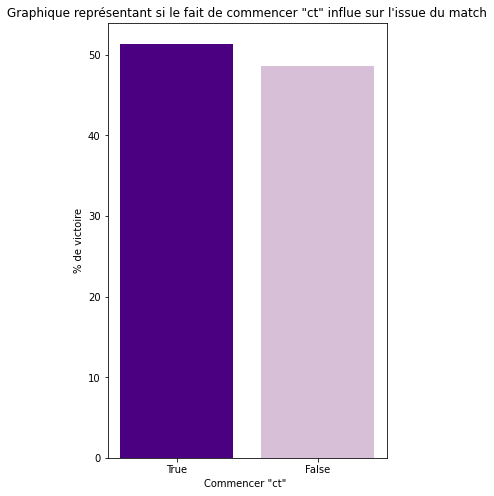

In [45]:
# on affiche
cles = boolDic.keys()
values = boolDic.values()
plt.figure(figsize=(5, 8))
plt.bar(cles, values,color=['indigo', 'thistle', 'crimson', 'orchid', 'hotpink'])
plt.xlabel("Commencer \"ct\" ")
plt.ylabel("% de victoire")
plt.title("Graphique représentant si le fait de commencer \"ct\" influe sur l'issue du match")